## 参考

VSCodeで R

https://code.visualstudio.com/docs/languages/r

Jupyter Notebookで R

https://nxdataka.netlify.app/rjup/

In [2]:

# Install required packages if not already installed
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("lubridate")
install.packages("forcats")


The downloaded binary packages are in
	/var/folders/9j/5q4qwns11lv47mtj3ykbp5_40000gn/T//RtmpTi2x1Y/downloaded_packages

The downloaded binary packages are in
	/var/folders/9j/5q4qwns11lv47mtj3ykbp5_40000gn/T//RtmpTi2x1Y/downloaded_packages

The downloaded binary packages are in
	/var/folders/9j/5q4qwns11lv47mtj3ykbp5_40000gn/T//RtmpTi2x1Y/downloaded_packages

The downloaded binary packages are in
	/var/folders/9j/5q4qwns11lv47mtj3ykbp5_40000gn/T//RtmpTi2x1Y/downloaded_packages


In [1]:
# Load required libraries
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(forcats)
options(dplyr.summarise.inform = FALSE)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
v readr     2.1.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the CSV file 
data <- read.csv("../merged_202204-202303_noduplabel.csv") # optional ,header=T,fileEncoding = "utf8")
#data <- read_csv("../merged_202204-202303.csv",locale = locale(encoding = "utf8"),col_types = cols(.default = "c"))

# Convert the "date" column to Date format
data$date <- as.Date(data$date)

# Extract the first day of the week from the date
data$week <- floor_date(data$date, unit = "week")

head(data)

,date,URL,description,week
,<date>,<chr>,<chr>,<date>
1,2022-04-01,https://www-cr-mufg-jp.lgoo666.com/?ja=ulcvg.m88jb,<89><8f>UFJ<83><8b><82><82>,2022-03-27
2,2022-04-01,https://www-cr-mufg-jp.lgoo666.com/select/,<89><8f>UFJ<83><8b><82><82>,2022-03-27
3,2022-04-01,https://armzon.veribelcenter.com/,<82><83><9d><82><82><83><83><89>,2022-03-27
4,2022-04-01,https://amaounz.jdfuhrtjt8.top/,Amazon,2022-03-27
5,2022-04-01,https://www2.epoesnacasn.icu,<82><83><9d><82><82><83><83><89>,2022-03-27
6,2022-04-01,https://www2.epoesnacesn.icu,<82><83><9d><82><82><83><83><89>,2022-03-27


In [3]:
# Calculate distinct count of URL by description and week
distinct_count <- data %>%
  group_by(description, week) %>%
  summarise(distinct_count = n_distinct(URL)) %>%
  ungroup()

head(distinct_count)


description,week,distinct_count
<chr>,<date>,<int>
<81><88><81><8d><81><81><81>,2022-04-03,76
<81><88><81><8d><81><81><81>,2022-04-10,31
<81><88><81><8d><81><81><81>,2022-04-17,6
<81><88><81><8d><81><81><81>,2022-04-24,5
<81><88><81><8d><81><81><81>,2022-05-01,3
<81><88><81><8d><81><81><81>,2022-05-08,19


In [4]:
# Get the top 30 descriptions
top_descriptions <- distinct_count %>%
  group_by(description) %>%
  summarise(total_count = sum(distinct_count)) %>%
  arrange(desc(total_count)) %>%
  top_n(30)

head(top_descriptions)

Selecting by total_count


description,total_count
<chr>,<int>
<89><95><8f><8f><8b><82><83><83><89>,5568
au,5545
Amazon,5354
<89><8f>UFJ<83><8b><82><82>,5334
<81><88><81><8d><81><81><81>,3995
<82><82><83><82><83><83><89>,3352


In [5]:
# Modify the description column
distinct_count_modified <- distinct_count %>%
  mutate(description = fct_other(description, keep = top_descriptions$description, other_level = "OTHERS"))

head(distinct_count_modified)

description,week,distinct_count
<fct>,<date>,<int>
<81><88><81><8d><81><81><81>,2022-04-03,76
<81><88><81><8d><81><81><81>,2022-04-10,31
<81><88><81><8d><81><81><81>,2022-04-17,6
<81><88><81><8d><81><81><81>,2022-04-24,5
<81><88><81><8d><81><81><81>,2022-05-01,3
<81><88><81><8d><81><81><81>,2022-05-08,19


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'HiraKakuPro-W3' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'HiraKakuPro-W3' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'HiraKakuPro-W3' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'HiraKakuPro-W3' not found in PostScript font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'HiraKakuPro-W3' not found in PostScript font database"
Warning message in grid.Call(C

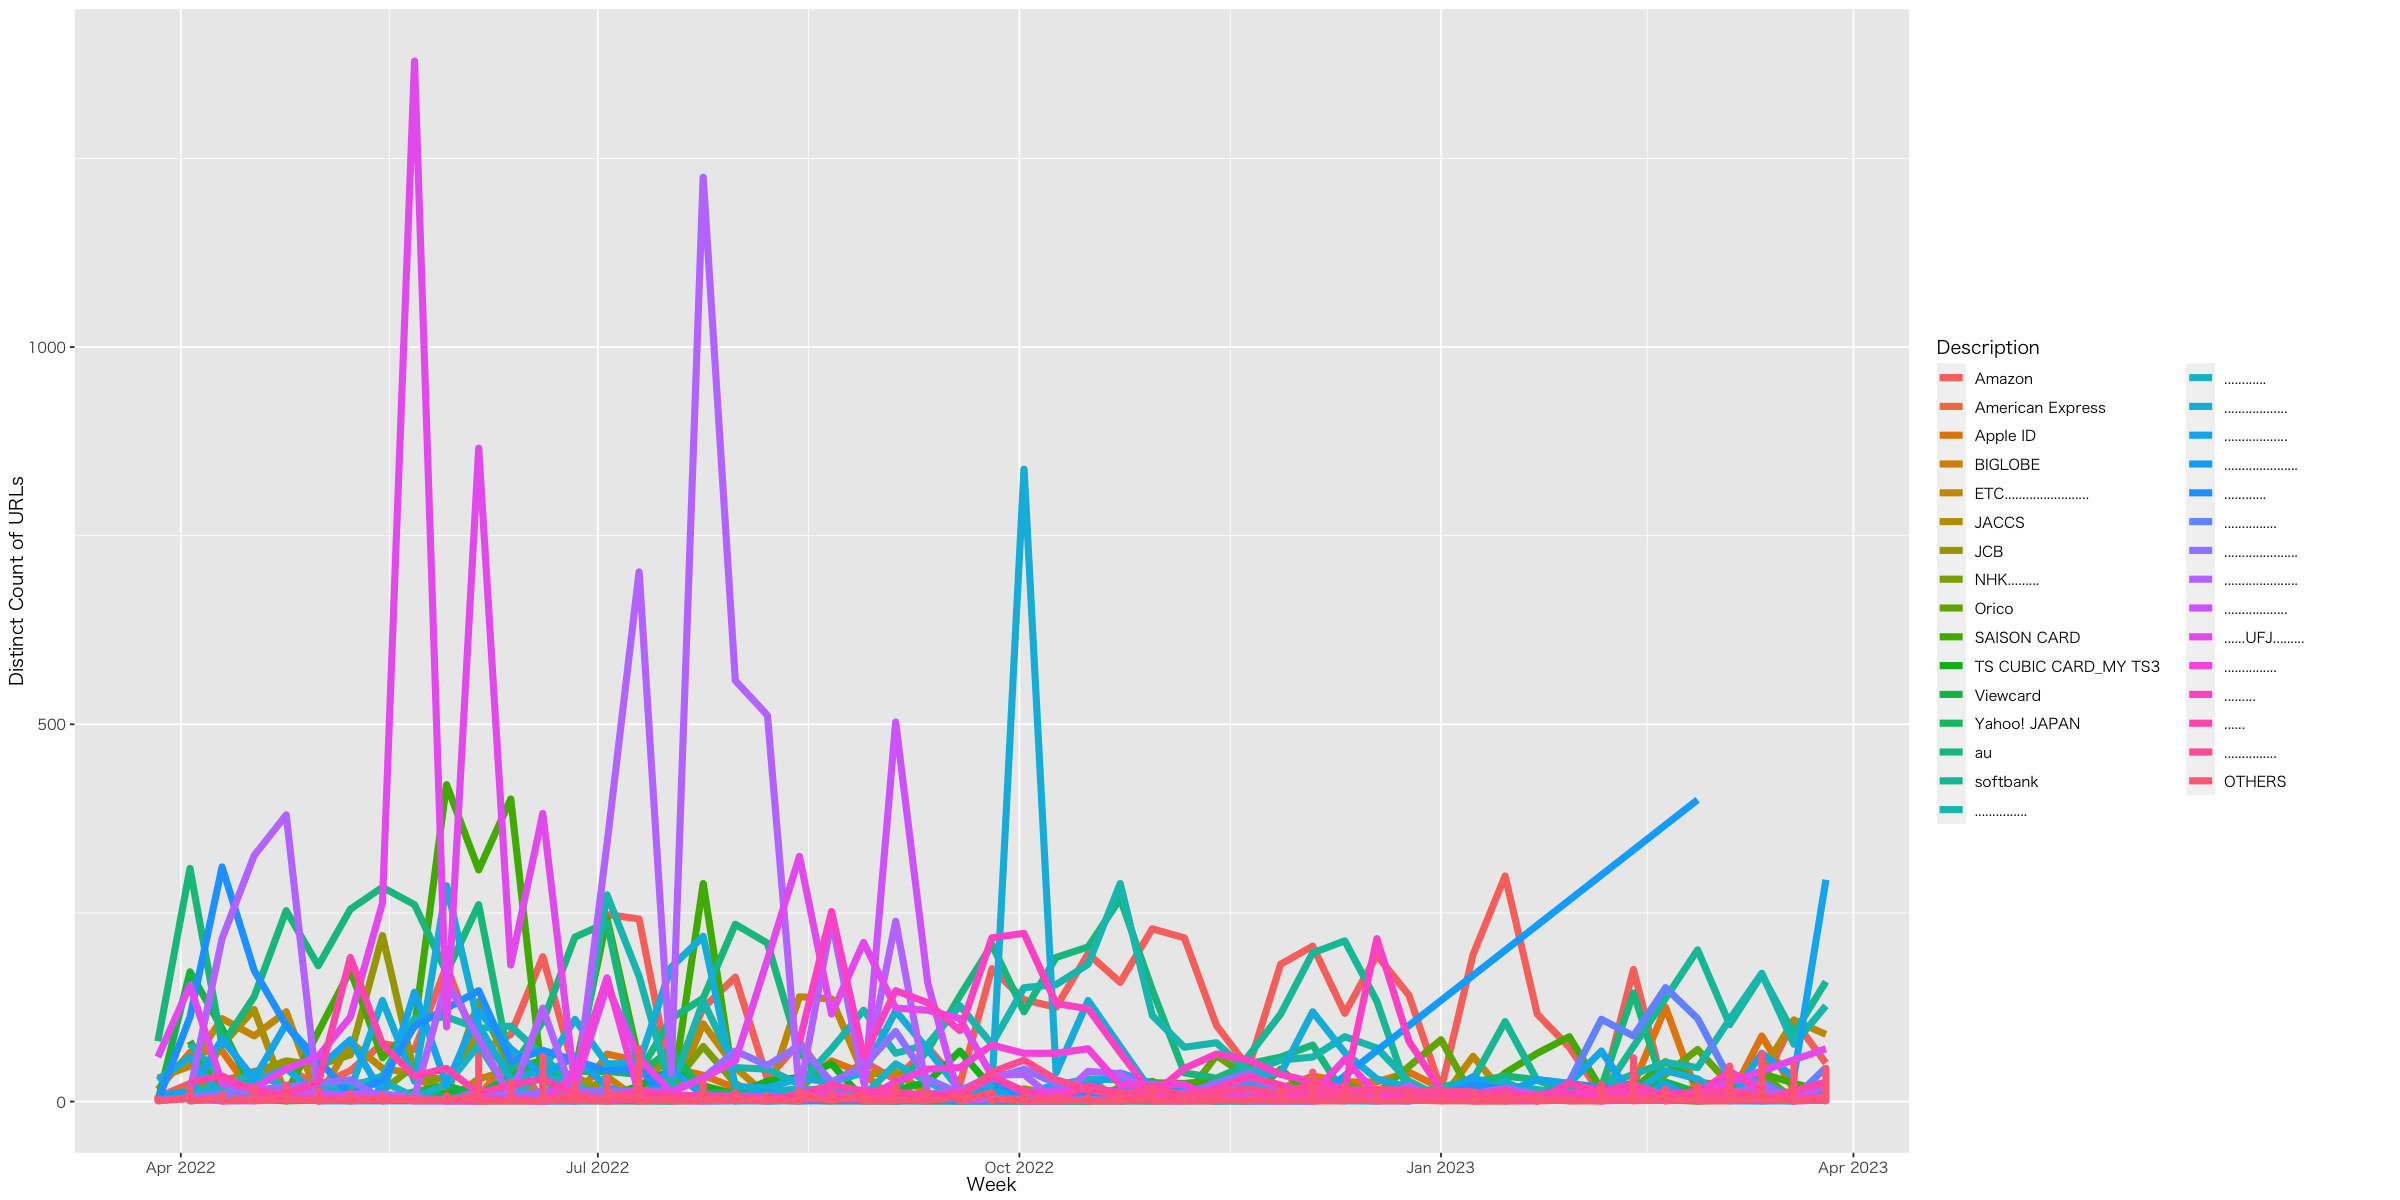

In [6]:
# Create the line chart with multiple legends
options(repr.plot.width = 20, repr.plot.height =10)
ggplot(distinct_count_modified, aes(x = week, y = distinct_count, color = description, linetype = description, group = interaction(description, week))) +
  geom_line(aes(group=factor(description)),linetype="solid",size=2) +
  labs(x = "Week", y = "Distinct Count of URLs", color = "Description", linetype = "Description") +
  scale_fill_brewer(palette = "Spectral") +
  theme(text = element_text(size = 20),element_line(size =1), panel.grid = element_line(linetype="solid",size=1), legend.position = "bottom", legend.direction = "horizontal") +
  theme_gray (base_family = "HiraKakuPro-W3")